<a href="https://colab.research.google.com/github/srinivas365/GlassQualityPrediction_MachineHack/blob/master/MachineHack_week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Glass Quality Prediction : Weekend Hackathon #6
# Leader Board Rank - 127

We humans have been using glass since ancient times for a variety of applications from building construction to making decorative objects. With technology, glass and its applications have evolved, and today, we have different varieties of glass used for very different purposes from a computer monitor to a bulletproof car window depending on the grade of the glass produced. And not all grades or varieties are manufactured the same way. In this data science challenge, you as a data scientist must use the given data to predict the grade of the glass produced based on the given factors.

Given are 15 distinguishing factors that can provide insight into what grade of the glass is being produced. Your objective as a data scientist is to build a machine learning model that can predict the grade of glass based on the given factors.

Data Description:-
The unzipped folder will have the following files.

Train.csv – 1358 observations.
Test.csv – 583 observations.
Sample Submission – Sample format for the submission.
Target Variable: class

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train=pd.read_csv('Train.csv')
train.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


In [0]:
test=pd.read_csv('Test.csv')
test.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


In [0]:
test.shape

(583, 15)

In [0]:
sub=pd.read_excel('Sample_Submission.xlsx')
sub.head()

,1,2
0,0.600493,0.399507
1,0.532010,0.467990
2,0.892149,0.107851
3,0.694834,0.305166
4,0.740557,0.259443


# Data Understanding

In [0]:
train.shape

(1358, 16)

In [0]:
train.columns

Index(['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
       'x_component_5', 'class'],
      dtype='object')

In [0]:
train.isnull().sum()

grade_A_Component_1    0
grade_A_Component_2    0
max_luminosity         0
thickness              0
xmin                   0
xmax                   0
ymin                   0
ymax                   0
pixel_area             0
log_area               0
x_component_1          0
x_component_2          0
x_component_3          0
x_component_4          0
x_component_5          0
class                  0
dtype: int64

In [0]:
train.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


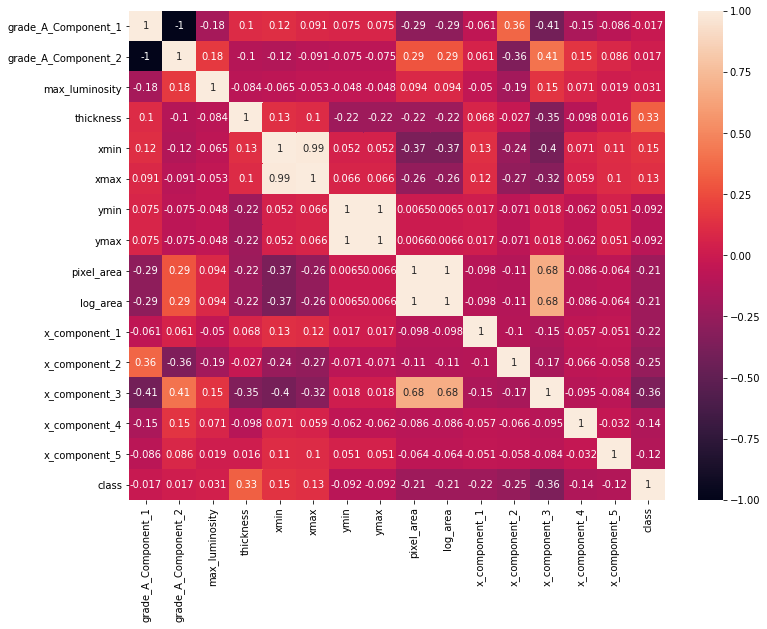

In [0]:
plt.figure(figsize=(12,9))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [0]:
def sub_file(filename,preds):
    sub_df=pd.DataFrame(preds,columns=['1','2'])
    sub_df.to_excel(filename,index=False)
    print(sub_df.head())

# Model Building

In [0]:
X=train.drop('class',axis=1)
y=train['class']

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,log_loss,make_scorer,classification_report
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV

In [0]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)

Shape of X_train: (950, 15)
Shape of X_test: (408, 15)


In [0]:

model_scores={}

def build_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)
    
    model_name = type(model).__name__
    train_acc=accuracy_score(y_train,y_train_pred)
    test_acc=accuracy_score(y_test,y_pred)
    
    print(confusion_matrix(y_test,y_pred))

    print(classification_report(y_test,y_pred))
    


    
    print("Training accuracy: : ",train_acc)
    print("Testing  accuracy: : ",test_acc)
    
    cv_results=cross_val_score(model,X_train,y_train,cv=10,n_jobs=-1)
    print("Cross validation:", cv_results.mean())

    cv_acc=cv_results.mean()
    model_scores.setdefault(model_name,[train_acc,test_acc,cv_acc])



    print("ROC_AUC-score:",roc_auc_score(y_test,y_pred))

# Logistic Regression

In [0]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
Xtr_std=std.fit_transform(X_train)
Xte_std=std.transform(X_test)
lr=LogisticRegression()
build_model(lr,Xtr_std,Xte_std,y_train,y_test)

[[227  39]
 [ 34 108]]
              precision    recall  f1-score   support

           1       0.87      0.85      0.86       266
           2       0.73      0.76      0.75       142

    accuracy                           0.82       408
   macro avg       0.80      0.81      0.80       408
weighted avg       0.82      0.82      0.82       408

Training accuracy: :  0.8336842105263158
Testing  accuracy: :  0.821078431372549
Cross validation: 0.8242105263157896
ROC_AUC-score: 0.8069734194641534


In [0]:
lr_preds=lr.predict_proba(std.transform(test))
sub_file('23-05-lr.xlsx',lr_preds)

          1         2
0  0.996013  0.003987
1  0.139276  0.860724
2  0.998029  0.001971
3  0.993699  0.006301
4  0.547032  0.452968


In [0]:
pd.read_excel('23-05-lr.xlsx').shape

(583, 2)

In [0]:
xg=XGBClassifier(random_state=42)
build_model(xg, X_train, X_test, y_train, y_test)

[[227  39]
 [ 28 114]]
              precision    recall  f1-score   support

           1       0.89      0.85      0.87       266
           2       0.75      0.80      0.77       142

    accuracy                           0.84       408
   macro avg       0.82      0.83      0.82       408
weighted avg       0.84      0.84      0.84       408

Training accuracy: :  0.911578947368421
Testing  accuracy: :  0.8357843137254902
Cross validation: 0.851578947368421
ROC_AUC-score: 0.8281001800275336


In [0]:
xg_preds=xg.predict_proba(test)
sub_file('23-05-xg.xlsx',xg_preds)

          1         2
0  0.987151  0.012849
1  0.267332  0.732668
2  0.965910  0.034090
3  0.990448  0.009552
4  0.560002  0.439998
